<a href="https://colab.research.google.com/github/Chl681006/Project/blob/main/OD(Autoencoder1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Autoencoder tensorflow版
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
from scipy import stats
import numpy as np
#它是一种神经网络模型，可用于检测异常点。它通过对数据进行编码和解码来重构输入数据，然后通过计算输入数据与重构数据之间的差异来检测异常点
#我们可以先使用Autoencoder训练一个模型来学习正常数据的表示，然后用该模型对所有数据进行重构，并计算每个数据点的重构误差。重构误差较大的数据点可能是异常值，


In [3]:
X_train = np.array([[0.05457441, 0.00773408],
       [0.05358265, 0.00881441],
       [0.04982931, 0.00849128],
       [0.04680667, 0.00770542],
       [0.04964223, 0.00929868],
       [0.04556077, 0.00761565],
       [0.04854265, 0.00921795],
       [0.04832876, 0.0088317 ],
       [0.04767556, 0.00832715],
       [0.04797683, 0.0084658 ],
       [0.04762395, 0.00891073],
       [0.04739286, 0.0086932 ],
       [0.04553577, 0.00791633],
       [0.04883061, 0.00835324],
       [0.05184952, 0.0090539 ],
       [0.04913787, 0.0090007 ],
       [0.0501608 , 0.00933444],
       [0.04811049, 0.00852102],
       [0.05053025, 0.00914345],
       [0.04923277, 0.00863267],
       [0.04836625, 0.0089309 ],
       [0.05031756, 0.00853091],
       [0.05043995, 0.00862014],
       [0.05265115, 0.00895845],
       [0.05560986, 0.00920085],
       [0.05060181, 0.00849026],
       [0.05398361, 0.00876301],
       [0.06027998, 0.009621  ],
       [0.05601951, 0.00976806],
       [0.05111995, 0.00814204],
       [0.05961667, 0.00938186]])

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.0026
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0024
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0022
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 0.0021
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.0018
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0013
Epoch 13/100
1/1 [==============================] -

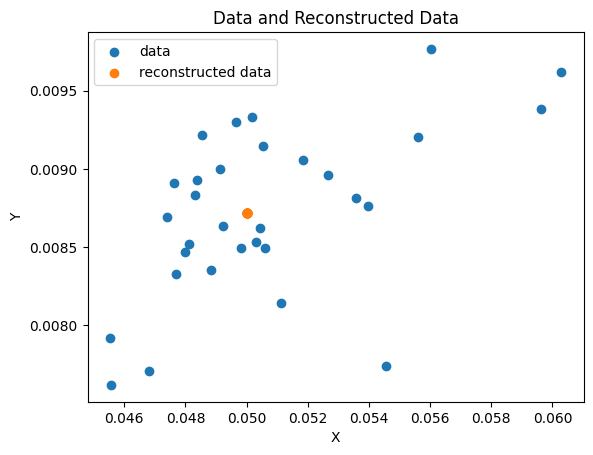

[[0.06027998 0.009621  ]
 [0.05601951 0.00976806]
 [0.05961667 0.00938186]]


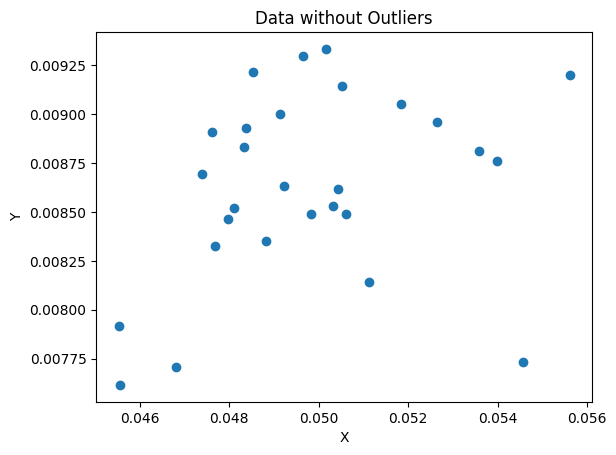

In [4]:
"""# 生成随机数据
np.random.seed(42)
data = np.random.randn(1000, 2) * 3 + 10

# 添加异常值
outliers = np.random.randn(50, 2) * 20 + np.array([10, -10])
data = np.vstack([data, outliers])"""

# 构建自编码器模型
input_dim = 2
encoding_dim = 1
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder_layer = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder_layer = tf.keras.layers.Dense(input_dim, activation='linear')(encoder_layer)
autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder_layer)

# 编译模型
autoencoder.compile(optimizer='adam', loss='mse')

# 训练模型
autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True)

# 预测并可视化重构数据
preds = autoencoder.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], label='data')
plt.scatter(preds[:, 0], preds[:, 1], label='reconstructed data')
plt.legend()
plt.title('Data and Reconstructed Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 计算重构误差
mse = np.mean(np.power(X_train - preds, 2), axis=1)

# 设定阈值并剔除异常值
threshold = np.percentile(mse, 90)
clean_data = X_train[mse <= threshold]
outliers = X_train[mse > threshold]
print(outliers)
# 可视化处理后的数据
plt.scatter(clean_data[:, 0], clean_data[:, 1])
plt.title('Data without Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

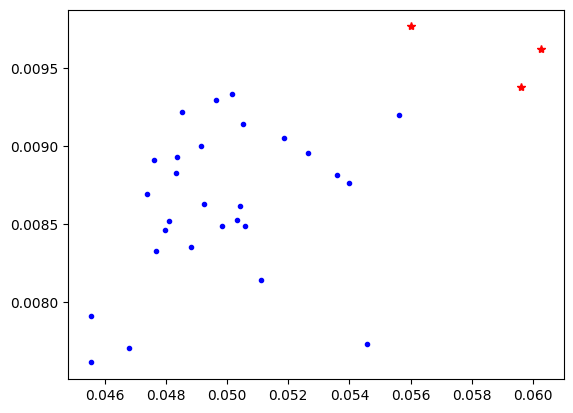

In [5]:
plt.plot(clean_data[:, 0],clean_data[:, 1],'b.')
plt.plot(outliers[:, 0],outliers[:, 1],'r*')